# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random

In [3]:
df = pd.read_csv('/datasets/users_behavior.csv')

Посмотрим на общую информацию

In [5]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Название столбца| Описание
----|---
сalls | количество звонков,
minutes | суммарная длительность звонков в минутах,
messages | количество sms-сообщений,
mb_used | израсходованный интернет-трафик в Мб,
is_ultra | каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

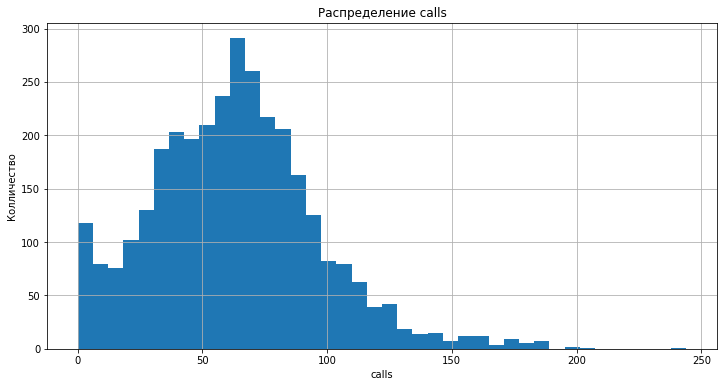

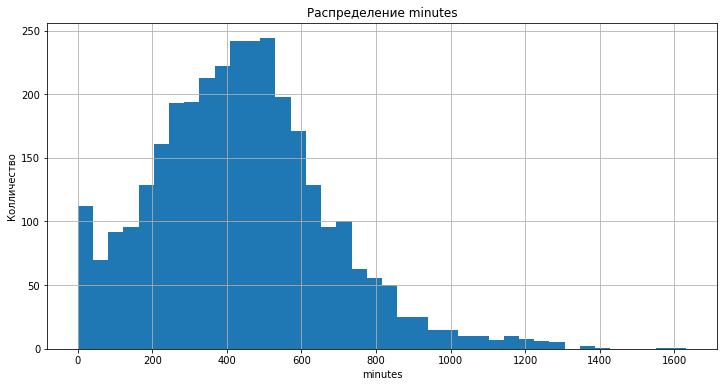

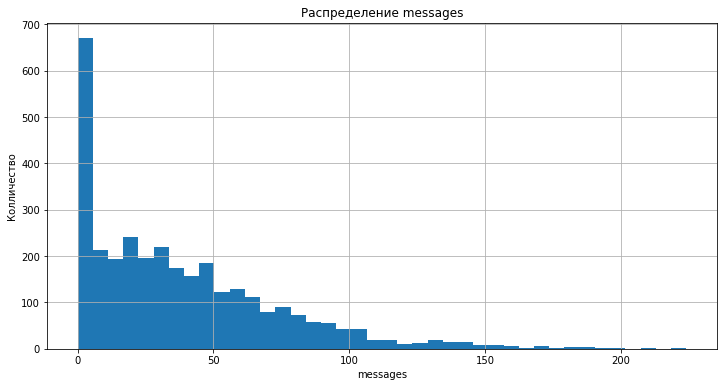

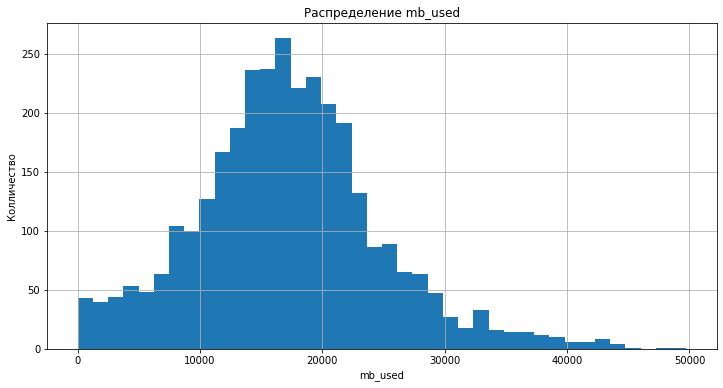

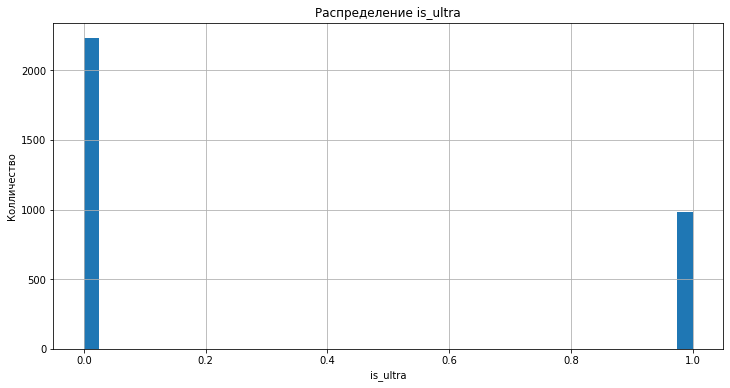

In [7]:
for i in df.columns:
    df[i].hist(figsize=(12, 6), bins = 40)
    plt.title('Распределение ' + i)
    plt.ylabel('Колличество')
    plt.xlabel(i)
    plt.show()

In [8]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


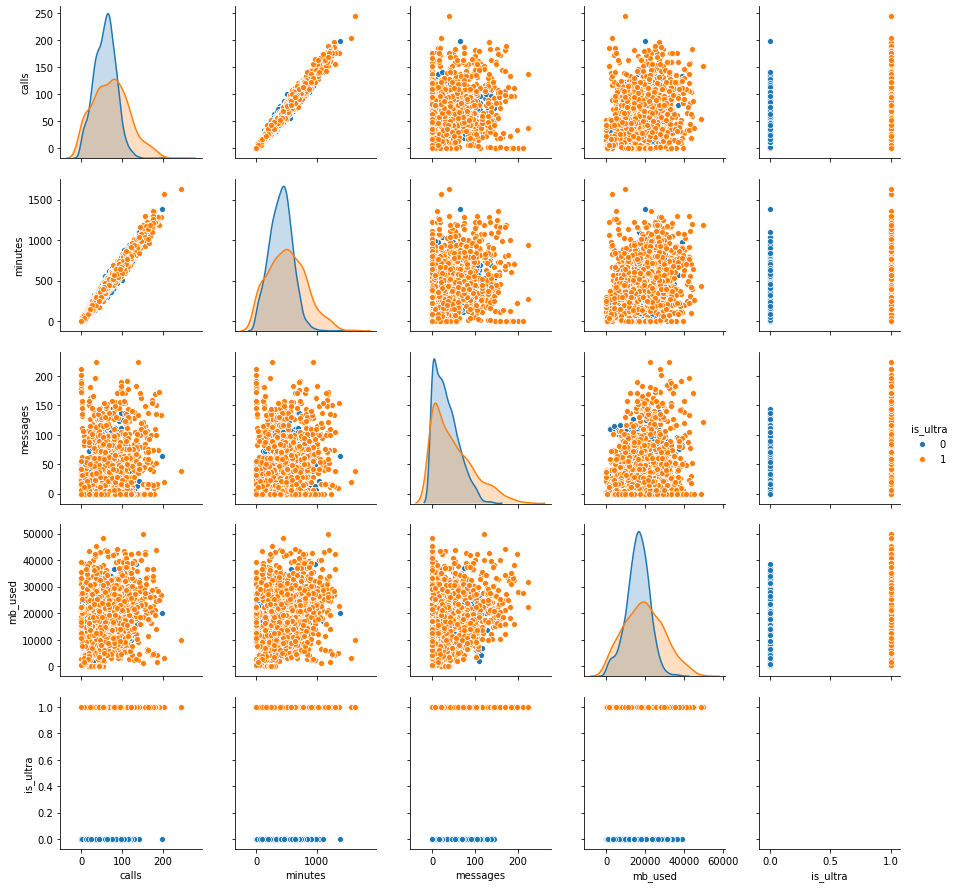

In [16]:
sns.pairplot(df, hue = 'is_ultra')

In [10]:
df['calls']=df['calls'].astype('int64')
df['messages']=df['messages'].astype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null int64
minutes     3214 non-null float64
messages    3214 non-null int64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(2), int64(3)
memory usage: 125.7 KB


### Вывод

Данные открыты. В данных хранится оснавая информация о том сколько  пользователь использовал тел в этом месяце. В них описаны основные характеристики колличество звонков, суммарная длительность звонков в минутах,количество sms-сообщений, израсходованный интернет-трафик в Мб и каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0). Так же замечена высокая корреляция между calls и minutes - это может повлиять на качество обучаемых моделей.

Были изменены типы данных в столбцах calls и messages на int

## Разбейте данные на выборки

Разобьем наши данные на несколько. На  на обучающую, валидационную и тестовую в соотношении 6/2/2

In [13]:
df_train, df_valid = train_test_split(df, test_size=0.4, random_state=12345)

In [14]:
df_valid,df_test = train_test_split(df_valid,test_size=0.5, random_state=12345)

Посмтрим на df_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 3027 to 482
Data columns (total 5 columns):
calls       1928 non-null int64
minutes     1928 non-null float64
messages    1928 non-null int64
mb_used     1928 non-null float64
is_ultra    1928 non-null int64
dtypes: float64(2), int64(3)
memory usage: 90.4 KB


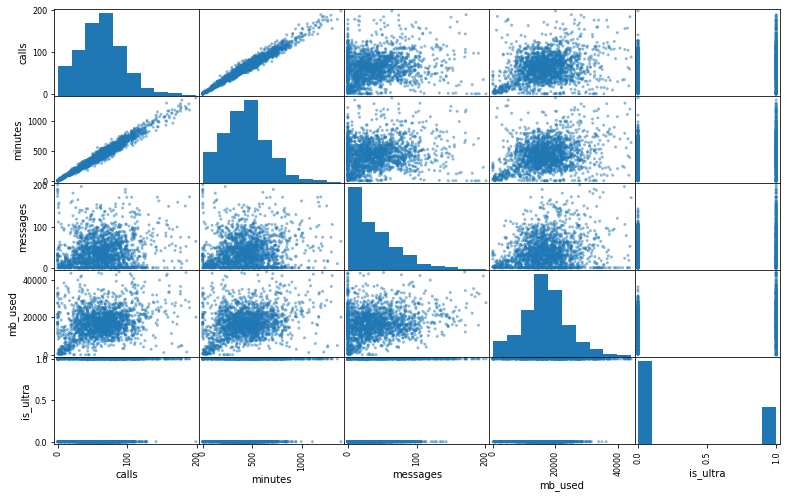

In [15]:
df_train.info()
pd.plotting.scatter_matrix(df_train,figsize=(13, 8))
plt.show()

Посмтрим на df_valid

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 1386 to 3197
Data columns (total 5 columns):
calls       643 non-null int64
minutes     643 non-null float64
messages    643 non-null int64
mb_used     643 non-null float64
is_ultra    643 non-null int64
dtypes: float64(2), int64(3)
memory usage: 30.1 KB


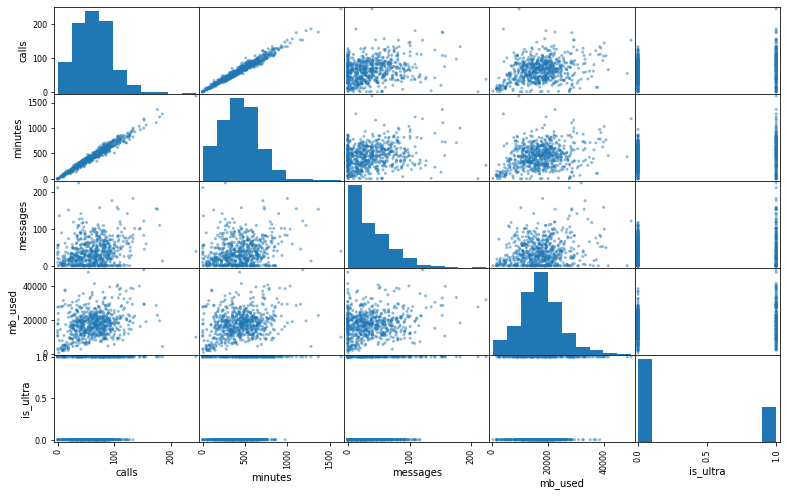

In [16]:
df_valid.info()
pd.plotting.scatter_matrix(df_valid,figsize=(13, 8))
plt.show()

Посмотрим на df_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 160 to 2313
Data columns (total 5 columns):
calls       643 non-null int64
minutes     643 non-null float64
messages    643 non-null int64
mb_used     643 non-null float64
is_ultra    643 non-null int64
dtypes: float64(2), int64(3)
memory usage: 30.1 KB


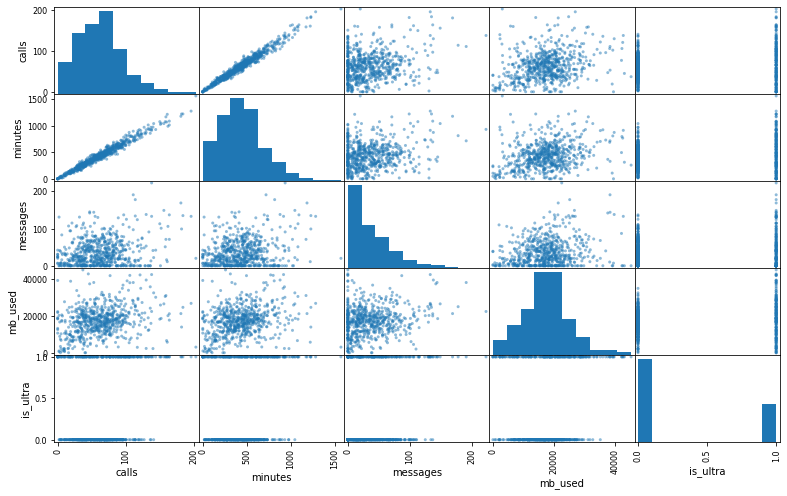

In [17]:
df_test.info()
pd.plotting.scatter_matrix(df_test,figsize=(13, 8))
plt.show()

### Вывод

Разобили наши данные на несколько выборок. На  на обучающую, валидационную и тестовую в соотношении 6/2/2

## Исследуйте модели

Рвзобьем столбцы тренеровочные и валидационные выборки на входящие данные(все столбцы кроме is_ultra) и то что мы должны предсказать(столбец is_ultra)

In [19]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid =df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

Так же у нас есть высокая коллеряция между calls и minutes, тк минуты по моему мнению дадут больше информации чем колличество звонков, выделим отдельные входящие данные без calls

In [20]:
features_train_2 = features_train.drop(['calls'], axis=1)
features_valid_2 = features_valid.drop(['calls'], axis=1)

###  Дерево

In [21]:
best_accuracy = 0
best_depth = 0
for depth in range(1,20):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(features_train,target_train) 
    predictions_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)
    if accuracy > best_accuracy:
        best_depth = depth
        best_accuracy = accuracy
        print("Accuracy",best_accuracy, "Максимальная глубина:", best_depth)
print()
print("Accuracy лучшей модели:",best_accuracy,'глубина дерева',best_depth)

Accuracy 0.7542768273716952 Максимальная глубина: 1
Accuracy 0.7822706065318819 Максимальная глубина: 2
Accuracy 0.7853810264385692 Максимальная глубина: 3

Accuracy лучшей модели: 0.7853810264385692 глубина дерева 3


Так у нас есть корреляция между calls и minutes, а дерево страдает от мультиколлинеарности, убирем из модели calls и посмотрим улучшится ли результат

In [22]:
best_accuracy = 0
best_depth = 0
for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(features_train_2,target_train) 
    predictions_valid = model.predict(features_valid_2)
    accuracy = accuracy_score(target_valid, predictions_valid)
    if accuracy > best_accuracy:
        best_depth = depth
        best_accuracy = accuracy
        print("Accuracy",best_accuracy, "Максимальная глубина:", best_depth)
print()
print("Accuracy лучшей модели без столбца calls:",best_accuracy,'глубина дерева',best_depth)

Accuracy 0.7542768273716952 Максимальная глубина: 1
Accuracy 0.7822706065318819 Максимальная глубина: 2
Accuracy 0.7853810264385692 Максимальная глубина: 3
Accuracy 0.7884914463452566 Максимальная глубина: 4

Accuracy лучшей модели без столбца calls: 0.7884914463452566 глубина дерева 4


Да результат улучшился и глубина дерева стала больше

### Случайный лес

In [23]:
best_est = 0
best_depth = 0
best_accuracy = 0
 
for est in range(35, 51, 1):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345,n_estimators=est,max_depth=depth)
        model.fit(features_train,target_train) 
        predictions_valid = model.predict(features_valid)
        accuracy = accuracy_score(target_valid, predictions_valid)
        if accuracy > best_accuracy:
            best_est = est
            best_depth = depth
            best_accuracy = accuracy
            print("Accuracy",best_accuracy, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)
print()
print("Accuracy лучшей модели:", best_accuracy, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

Accuracy 0.7884914463452566 Количество деревьев: 35 Максимальная глубина: 1
Accuracy 0.7993779160186625 Количество деревьев: 35 Максимальная глубина: 6
Accuracy 0.8009331259720062 Количество деревьев: 35 Максимальная глубина: 7
Accuracy 0.8040435458786936 Количество деревьев: 36 Максимальная глубина: 7
Accuracy 0.8055987558320373 Количество деревьев: 38 Максимальная глубина: 7
Accuracy 0.8087091757387247 Количество деревьев: 40 Максимальная глубина: 8

Accuracy лучшей модели: 0.8087091757387247 Количество деревьев: 40 Максимальная глубина: 8


Случайный лес не страдает от мультиколлинеарности проверки без calls нет необходимости.

### Логистическая  регрессия

In [24]:
model = LogisticRegression() 
model.fit(features_train,target_train) 
predictions_valid = model.predict(features_valid) 
accuracy = accuracy_score(target_valid, predictions_valid)
print("Accuracy модели:",accuracy)

Accuracy модели: 0.7589424572317263


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Проверим без calls

In [25]:
model = LogisticRegression() 
model.fit(features_train_2,target_train) 
predictions_valid = model.predict(features_valid_2) 
accuracy = accuracy_score(target_valid, predictions_valid)
print("Accuracy модели без столбца calls:",accuracy)

Accuracy модели без столбца calls: 0.7076205287713841


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Стало хуже. Оствим с calls

### Вывод

- Дерево Accuracy лучшей модели была без столбца calls: 0.7884914463452566 глубина дерева 4
- Случайный лес Accuracy лучшей модели: 0.8087091757387247 Количество деревьев: 40 Максимальная глубина: 8
- Логистическая регрессия Accuracy модели: 0.7589424572317263

Лучший результат показала модель Случайный лес с Количество деревьев: 40 Максимальная глубина: 8 используем ее.

## Проверьте модель на тестовой выборке

In [26]:
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

In [27]:
model_best = RandomForestClassifier(random_state=12345,n_estimators=40,max_depth=8)
model_best.fit(features_train,target_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [28]:
predictions_test = model_best.predict(features_test)
accuracy = accuracy_score(target_test, predictions_test)
print('Accuracy модели на тестовой выборке =',accuracy)

Accuracy модели на тестовой выборке = 0.7962674961119751


### Вывод 

Случайный лес с Количество деревьев: 40 Максимальная глубина: 8 показал на тестовой выборке Accuracy = 0.7962674961119751

## (бонус) Проверьте модели на адекватность

In [29]:
1-df['is_ultra'].mean()

0.693528313627878

Если взять все 0 то мы окажемся правы в 70% верными 

In [31]:
a_0 = []
for i in range(len(target_test)):
    a_0.append(0)

In [32]:
a_0

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [33]:
accuracy_score(target_test, a_0)

0.6842923794712286

In [41]:
random_69 = []
for i in range(len(target_test)):
    rand_69.append(*random.choices(np.arange(0, 2), [1-df['is_ultra'].mean(), df['is_ultra'].mean()]))
display(rand_69)

[1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,


In [42]:
accuracy_score(target_test, random_69)

0.5956454121306376

Наша Модель на 20% точнее чем случайная выборка с частатой 0 равной 0.693528313627878

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [ ] Весь код исполняется без ошибок
- [ ] Ячейки с кодом расположены в порядке исполнения
- [ ] Выполнено задание 1: данные загружены и изучены
- [ ] Выполнено задание 2: данные разбиты на три выборки
- [ ] Выполнено задание 3: проведено исследование моделей
    - [ ] Рассмотрено больше одной модели
    - [ ] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [ ] Написаны выводы по результатам исследования
- [ ] Выполнено задание 3: Проведено тестирование
- [ ] Удалось достичь accuracy не меньше 0.75
